https://github.com/arunm8489/Amazon_Fine_Food_Reviews-sentiment_analysis/blob/master/Notebooks/4.%20Logistic_regression.ipynb

https://towardsdatascience.com/sentiment-analysis-on-amazon-food-reviews-from-eda-to-deployment-f985c417b0c

https://www.kaggle.com/code/poonaml/text-classification-using-spacy

https://www.kaggle.com/code/elshatakmaev/review-classification-using-pytorch

#### Dependencies

###  1. Data Processing

#### Show DataFrame

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
#!pip install numpy==1.21.2

In [3]:
#!pip install pandas

In [4]:
df = pd.read_csv('../data/amazon_fine_food_reviews.csv')

In [5]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.shape

(568454, 10)

#### Data Cleaning

##### Remove Nan

In [8]:
df.Summary.isnull().sum()

27

In [9]:
df.dropna(subset=['Summary'], inplace=True)

In [10]:
df.Summary.isnull().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568427 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568427 non-null  int64 
 1   ProductId               568427 non-null  object
 2   UserId                  568427 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568427 non-null  int64 
 5   HelpfulnessDenominator  568427 non-null  int64 
 6   Score                   568427 non-null  int64 
 7   Time                    568427 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568427 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [12]:
df.shape

(568427, 10)

##### Deduplication

In [13]:
df.drop_duplicates(subset=['UserId','ProfileName','Time','Text'], keep='first',inplace=True)

In [14]:
df.shape

(393930, 10)

##### Remove colums without useful information

In [15]:
df.drop(['Id','UserId','ProfileName'], axis=1, inplace=True)

In [16]:
df.shape

(393930, 7)

In [17]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##### Transform time format and add new column

In [18]:
import datetime

In [19]:
datetime.datetime.fromtimestamp(df.loc[0,'Time'])

datetime.datetime(2011, 4, 27, 2, 0)

In [20]:
df['DateTime'] = df['Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [21]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00


In [22]:
df.shape

(393930, 8)

##### Avoid HelpfulnessNumerator bigger that HelpfulnessDenominator

In [23]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime
44736,B001EQ55RW,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,2008-06-08 02:00:00
64421,B000MIDROQ,3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,2008-10-25 02:00:00


In [24]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [25]:
df.shape

(393928, 8)

In [26]:
#Checking to see how much % of data still remains
#print(f'Remaining data is {((shape[0]*1.0)/(df.shape[0]*1.0))*100}')

https://www.kaggle.com/code/prasheel1047/review-positive-or-negative?scriptVersionId=78532145&cellId=16

https://www.kaggle.com/code/harits/amazon-reviews-sentiment-analysis?scriptVersionId=115541011&cellId=5

##### Remove Special characters

##### Tokenization

##### Remove Stop-words

##### Text normalization
- Convert Lower or Upper case
- Remove punctuation
  

##### Steamming or Lemmatization

### 2. Exploratory Data Analysis

In [27]:
#!pip install matplotlib

In [28]:
import matplotlib.pyplot as plt

#### Descriptive analysis of the data (basic statistics, distributions, etc.).

In [29]:
df.head()

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00


In [30]:
df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,DateTime
count,393928.000000,393928.000000,393928.000000,3.939280e+05,393928
mean,1.734401,2.204758,4.179408,1.296449e+09,2011-01-31 06:26:31.618773248
min,0.000000,0.000000,1.000000,9.393408e+08,1999-10-08 02:00:00
25%,0.000000,0.000000,4.000000,1.271376e+09,2010-04-16 02:00:00
50%,0.000000,1.000000,5.000000,1.311638e+09,2011-07-26 02:00:00
75%,2.000000,2.000000,5.000000,1.332979e+09,2012-03-29 02:00:00
max,866.000000,923.000000,5.000000,1.351210e+09,2012-10-26 02:00:00
std,6.872306,7.534738,1.311925,4.840316e+07,NaN


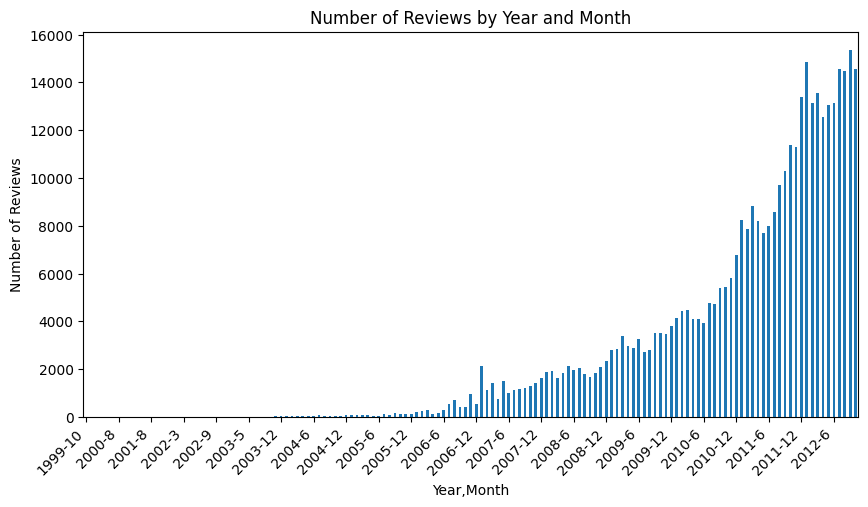

In [31]:
# Assuming 'DateTime' is the column containing timestamps
# Convert the column to datetime format if needed
df['DateTime'] = pd.to_datetime(df['DateTime'])
 
# Extract the year and month components
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Group by year and month, and count occurrences
monthly_counts = df.groupby(['Year', 'Month']).size()

# Create the time series plot
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', title='Number of Reviews by Year and Month')

xticks = monthly_counts.index.map(lambda x: f"{x[0]}-{x[1]}")
xticks = xticks[::6]  # Selecciona cada 6 meses
plt.gca().set_xticks(range(0, len(xticks) * 6, 6))
plt.gca().set_xticklabels(xticks, rotation=45, ha='right')

plt.ylabel('Number of Reviews')

# Save the plot
plt.savefig('../reports/images/reviews_for_Year_Month.png')
 
# Show the plot
plt.show()

In [32]:
df.head(1)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4


In [33]:
dff = df[['Text','Score']]
dff['date'] = pd.to_datetime(df['Time'],unit='s')

C:\Users\ana.poveda.garcia\AppData\Local\Temp\ipykernel_13272\1429197469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['date'] = pd.to_datetime(df['Time'],unit='s')


In [34]:
dff

,Text,Score,date
0,I have bought several of the Vitality canned d...,5,2011-04-27
1,Product arrived labeled as Jumbo Salted Peanut...,1,2012-09-07
2,This is a confection that has been around a fe...,4,2008-08-18
3,If you are looking for the secret ingredient i...,2,2011-06-13
4,Great taffy at a great price. There was a wid...,5,2012-10-21
...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,2011-03-09
568450,I'm disappointed with the flavor. The chocolat...,2,2012-03-09
568451,"These stars are small, so you can give 10-15 o...",5,2012-02-21
568452,These are the BEST treats for training and rew...,5,2012-03-13


More year, more internet, more reviews

##### Reviews Days

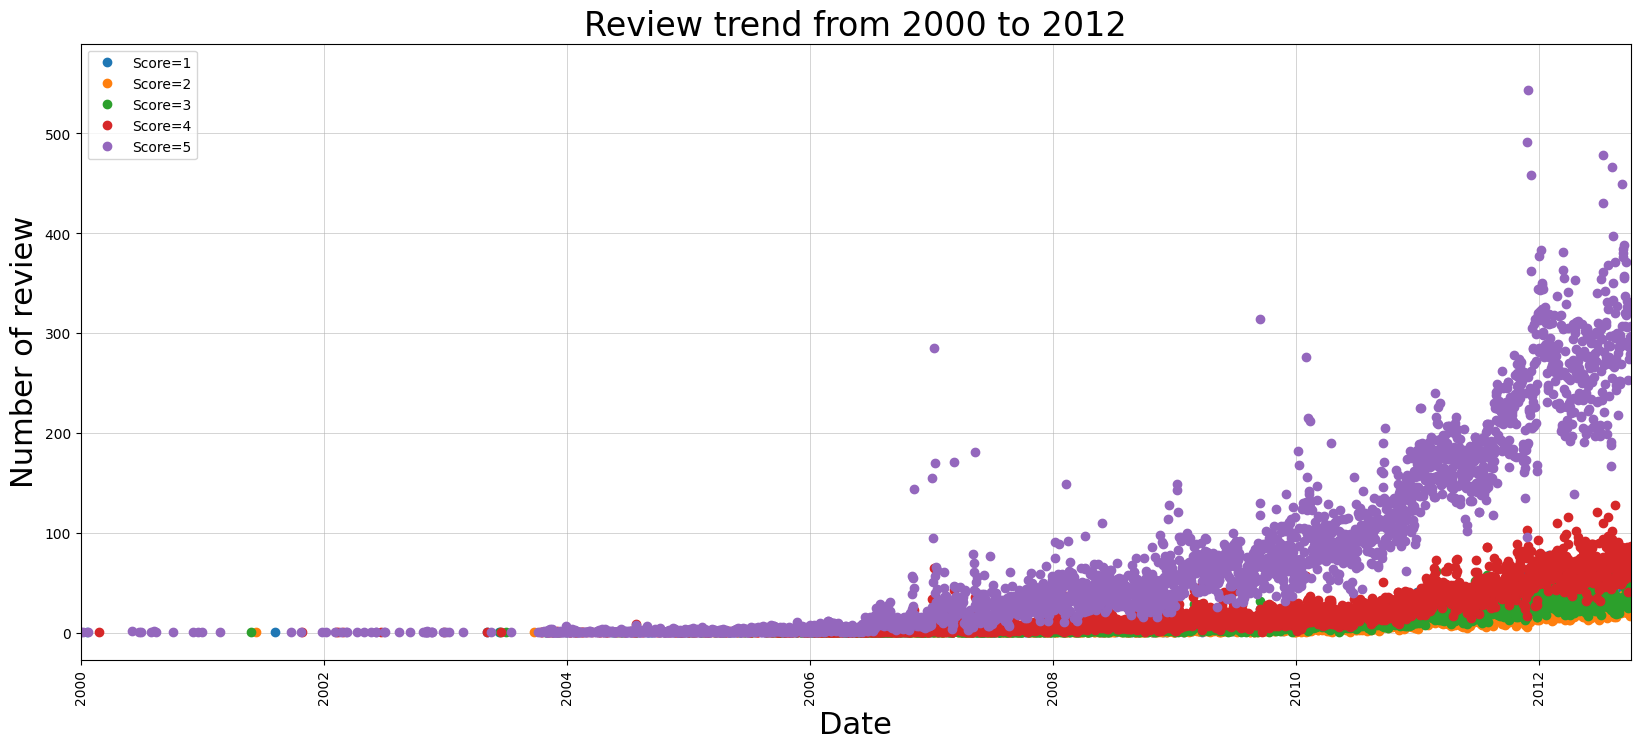

In [35]:
# Assuming 'dff' is your DataFrame

# Convert 'date' to datetime
#dff.date = df.date.dt.strftime('%Y-%m-%d')
#dff['date'] = pd.to_datetime(dff['date'] )

# Filter and count by score
scores = [1, 2, 3, 4, 5]
plt.figure(figsize=(20, 8))
for score in scores:
    dff_score = dff[dff['Score'] == score].groupby('date').size().reset_index(name='Count')
    plt.plot_date(x=dff_score['date'], y=dff_score['Count'], label=f'Score={score}')

# Customize the plot
plt.grid(linewidth=0.5, alpha=0.75)
plt.xticks(rotation=90)
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2012-10-01'))
plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of review', fontsize=22)
plt.title('Review trend from 2000 to 2012', fontsize=24)

# Save the plot
plt.savefig('../reports/images/review_trend_day.png')

# Show the legend
plt.legend()

# Show the plot
plt.show()

##### Reviews Month

C:\Users\ana.poveda.garcia\AppData\Local\Temp\ipykernel_13272\1326253661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.date = dff.date.dt.strftime('%Y-%m')
C:\Users\ana.poveda.garcia\AppData\Local\Temp\ipykernel_13272\1326253661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['date'] = pd.to_datetime(dff['date'] )


,Text,Score,date
0,I have bought several of the Vitality canned d...,5,2011-04-01
1,Product arrived labeled as Jumbo Salted Peanut...,1,2012-09-01
2,This is a confection that has been around a fe...,4,2008-08-01
3,If you are looking for the secret ingredient i...,2,2011-06-01
4,Great taffy at a great price. There was a wid...,5,2012-10-01
...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,2011-03-01
568450,I'm disappointed with the flavor. The chocolat...,2,2012-03-01
568451,"These stars are small, so you can give 10-15 o...",5,2012-02-01
568452,These are the BEST treats for training and rew...,5,2012-03-01


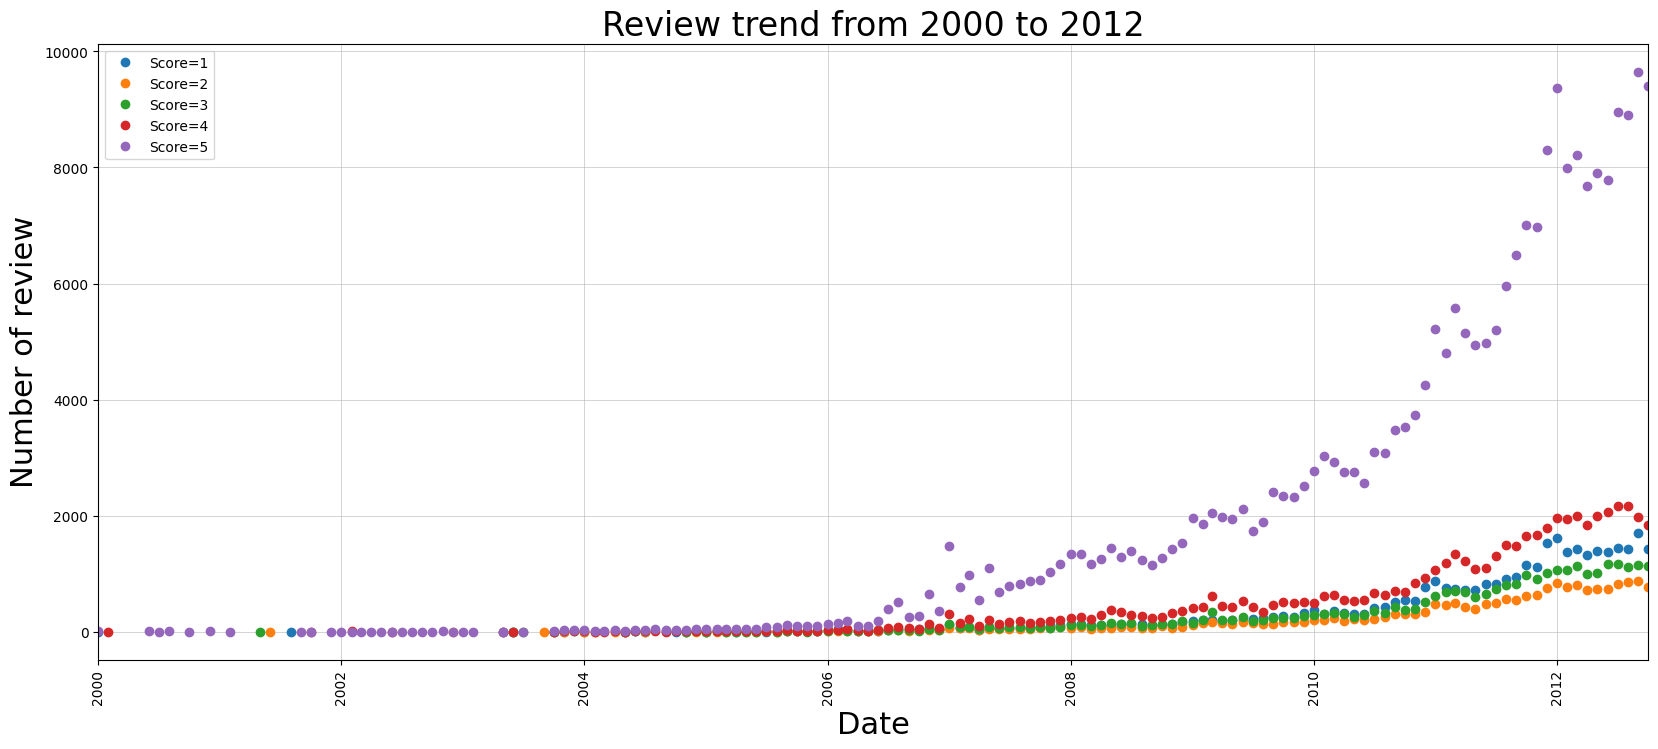

In [36]:
# Assuming 'dff' is your DataFrame

# Convert 'date' to datetime
dff.date = dff.date.dt.strftime('%Y-%m')
dff['date'] = pd.to_datetime(dff['date'] )
display(dff)

# Filter and count by score
scores = [1, 2, 3, 4, 5]
plt.figure(figsize=(20, 8))
for score in scores:
    dff_score = dff[dff['Score'] == score].groupby('date').size().reset_index(name='Count')
    plt.plot_date(x=dff_score['date'], y=dff_score['Count'], label=f'Score={score}')

# Customize the plot
plt.grid(linewidth=0.5, alpha=0.75)
plt.xticks(rotation=90)
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2012-10-01'))
plt.xlabel('Date', fontsize=22)
plt.ylabel('Number of review', fontsize=22)
plt.title('Review trend from 2000 to 2012', fontsize=24)

# Save the plot
plt.savefig('../reports/images/review_trend_month.png')

# Show the legend
plt.legend()

# Show the plot
plt.show()

#### Visualisation of the distribution of ratings (score column)

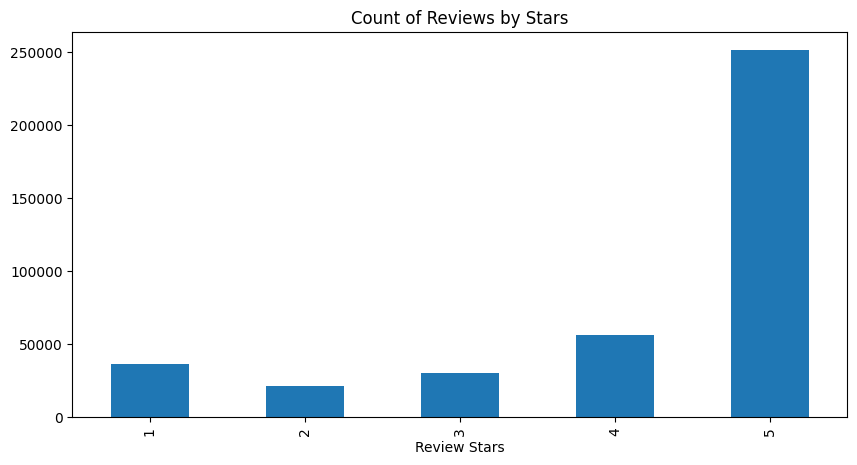

In [37]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')

# Save the plot
plt.savefig('../reports/images/review_score.png')

plt.show()

The dataset is unbalanced

##### Top 10 Reviewed Poducts

In [38]:
df

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00,2012,9
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00,2008,8
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00,2011,6
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00,2012,10
...,...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09 01:00:00,2011,3
568450,B003S1WTCU,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09 01:00:00,2012,3
568451,B004I613EE,2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21 01:00:00,2012,2
568452,B004I613EE,1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13 01:00:00,2012,3


Text(0.5, 1.0, 'Top 10 Reviewed Products')

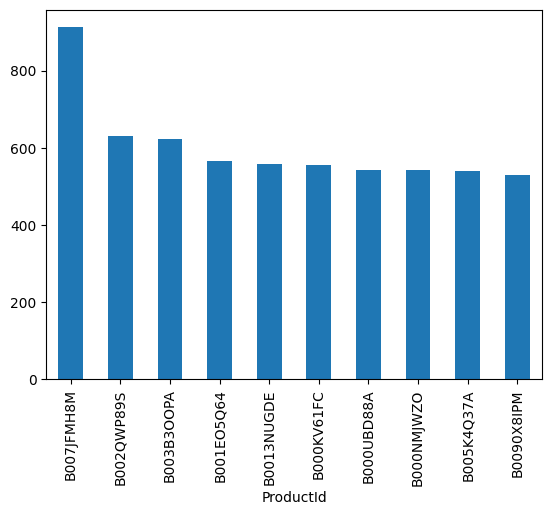

In [39]:
prod = df['ProductId'].value_counts().head(10) 
prod.plot(kind='bar') 
ax.set_title('Top 10 Reviewed Products')

##### Top 5 Reviewed Products for each Year

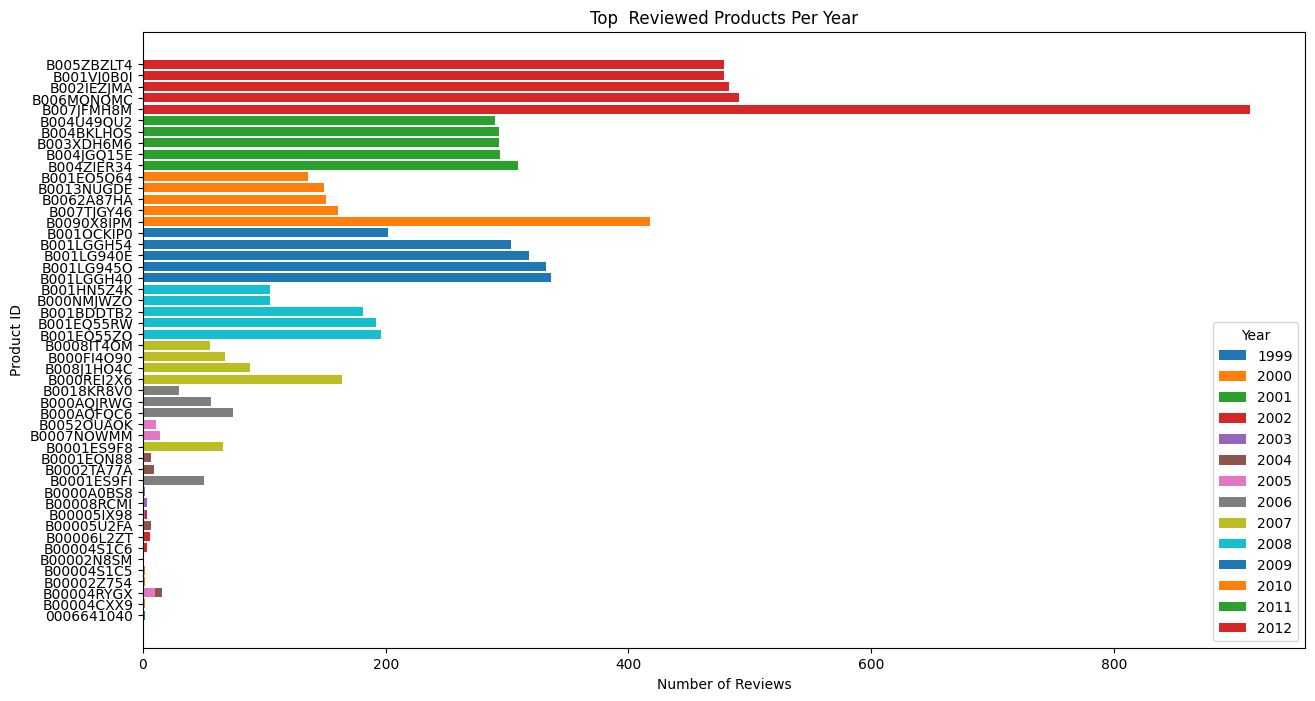

In [40]:
# Convert 'Time' column to datetime
df['Year'] = pd.to_datetime(df['Time'], unit='s').dt.year
 
# Group by year and product, and count the number of reviews
grouped_df = df.groupby(['Year', 'ProductId']).size().reset_index(name='ReviewCount')
 
# Get the top 10 reviewed products for each year
top_products_per_year = grouped_df.groupby('Year').apply(lambda x: x.nlargest(5, 'ReviewCount')).reset_index(drop=True)
 
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
 
for year in sorted(top_products_per_year['Year'].unique()):
    year_data = top_products_per_year[top_products_per_year['Year'] == year]
    ax.barh(year_data['ProductId'], year_data['ReviewCount'], label=str(year))
 
ax.set_title('Top  Reviewed Products Per Year')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Product ID')
ax.legend(title='Year')
plt.show()
 

### 3. Exploratory Data Text

#### Text Preprocessing 

https://www.kaggle.com/code/prasheel1047/review-positive-or-negative?scriptVersionId=78532145&cellId=16
https://www.kaggle.com/code/harits/amazon-reviews-sentiment-analysis?scriptVersionId=115541011&cellId=5

##### Remove Special characters

In [41]:
def remove_sub_text(pattern, text):
    pattern = re.compile(pattern) 
    clean_text = re.sub(pattern, ' ', text)
    return clean_text

In [42]:
type(df["Text"])

pandas.core.series.Series

In [43]:
#!pip install tqdm

In [44]:
import re
from tqdm.notebook import tqdm

In [45]:
tqdm.pandas()

In [46]:
# Remove URL
url_pattern = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
df["CleanText"] = df["Text"].progress_apply(lambda x: re.sub(url_pattern, ' ', x))
print("Remove URL: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove URL: Okay


In [47]:
# Remove HTML
pattern = '<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});'
df["CleanText"] = df["CleanText"].progress_apply(lambda x: remove_sub_text(pattern, x))
print("Remove HTML: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove HTML: Okay


In [48]:
# Remove Number
df["CleanText"] = df["CleanText"].progress_apply(lambda x: ''.join(s for s in x if not s.isdigit()))
print("Remove Number: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Number: Okay


In [49]:
# Remove Extra Spaces
df["CleanText"] = df["CleanText"].progress_apply(lambda x: ' '.join(x.split()))
print("Remove Extra Spaces: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Extra Spaces: Okay


##### Tokenization

In [50]:
#!pip install keras

In [51]:
#!pip install tensorflow

In [52]:
from keras.preprocessing.text import text_to_word_sequence

In [53]:
# Tokenization
df["TokenText"] = df["CleanText"].progress_apply(lambda x: text_to_word_sequence(x))
print("Tokenization: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Tokenization: Okay


##### Remove Stop-words

In [54]:
#!pip install nltk

In [55]:
import nltk
from nltk.corpus import stopwords

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ana.poveda.garcia\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
#!pip install textblob

In [58]:
#!python -m textblob.download_corpora lite

In [59]:
# Remove Stopwords
stop = set(stopwords.words('english'))
df["TokenText"] = df["TokenText"].progress_apply(lambda x: [word for word in x if word not in stop])
print("Remove Stopwords: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Stopwords: Okay


##### Text normalization
- Convert Lower or Upper case
- Remove punctuation

In [60]:
# Lower Casing
df["CleanText"] = df["CleanText"].progress_apply(lambda x: x.lower())
print("Lower Casing: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Lower Casing: Okay


##### Tagging (optional)

In [61]:
# def pos_tagging(token):
#     pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
#     tags = pos_tag(token)
#     newlist = []
#     for word, tag in tags:
#         newlist.append(tuple([word, pos_dict.get(tag[0])]))
#     return newlist

In [62]:
# import time
# from multiprocessing import Pool

In [63]:
# # POS Tagging
# start_time = time.time()
# pos_tagging_result = []
# with Pool() as pool:
#     result = pool.map_async(pos_tagging, df['TokenText'])
#     for result in result.get():
#         pos_tagging_result.append(result)
#     pool.close()
#     pool.join()
# df["POSTagged"] = pos_tagging_result
# print("--- %s seconds ---" % (time.time() - start_time))
# print("POS Tagging: Okay")

In [76]:
from nltk.corpus import wordnet
from nltk import pos_tag
import time

In [79]:
def pos_tagging(tokens):
    # Mapping dictionary for part-of-speech tags
    pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
    # Perform POS tagging and mapping of tags to WordNet POS tags
    tagged_tokens = []
    for token in tokens:
        tags = pos_tag(token)
        newlist = [(word, pos_dict.get(tag[0])) for word, tag in tags]
        tagged_tokens.append(newlist)
    return tagged_tokens


In [80]:
# Use the pos_tagging function
start_time = time.time()
pos_tagging_result = pos_tagging(df['TokenText'])

# Assign result to a column in the DataFrame df
df["POSTagged"] = pos_tagging_result

In [81]:
print("--- %s seconds ---" % (time.time() - start_time))
print("POS Tagging: Okay")

--- 1372.7638425827026 seconds ---
POS Tagging: Okay


##### Steamming or Lemmatization

In [82]:
from nltk.stem import WordNetLemmatizer

In [83]:
def lemmatize(pos_data):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [84]:
# Lemmatization
df['FinalText'] = df['POSTagged'].progress_apply(lemmatize)
print("Lemmatization")

  0%|          | 0/393928 [00:00<?, ?it/s]

Lemmatization


In [85]:
# Remove Extra Spaces Again
df["FinalText"] = df["FinalText"].progress_apply(lambda x: ' '.join(x.split()))
print("Remove Extra Spaces Again: Okay")

# Remove NaN Final Text
df = df.dropna(subset=["FinalText"])
print("Remove NaN Final Text: Okay")

# Remove Final Text with Only 1 Word
df["WordCount"] = df["FinalText"].progress_apply(lambda x: len(x.split()))
df = df[df["WordCount"]>1]
print("Remove Final Text with Only 1 Word: Okay")

  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Extra Spaces Again: Okay
Remove NaN Final Text: Okay


  0%|          | 0/393928 [00:00<?, ?it/s]

Remove Final Text with Only 1 Word: Okay


In [86]:
df.head(5)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month,CleanText,TokenText,POSTagged,FinalText,WordCount
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...","[(bought, v), (several, a), (vitality, n), (ca...",buy several vitality can dog food product find...,23
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00,2012,9,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...","[(product, n), (arrived, v), (labeled, a), (ju...",product arrive labeled jumbo salt peanut peanu...,18
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00,2008,8,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...","[(confection, n), (around, None), (centuries, ...",confection around century light pillowy citrus...,40
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00,2011,6,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...","[(looking, v), (secret, a), (ingredient, n), (...",look secret ingredient robitussin believe find...,18
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00,2012,10,great taffy at a great price. there was a wide...,"[great, taffy, great, price, wide, assortment,...","[(great, a), (taffy, a), (great, a), (price, n...",great taffy great price wide assortment yummy ...,13


In [ ]:
# Guardar el DataFrame como un archivo CSV
df.to_csv('../data/reviews_clean.csv', index=False)

### 3. Sentiment Analysis

https://www.kaggle.com/code/harits/amazon-reviews-sentiment-analysis

#### OUTLIERS SENTIMENT ANALYSIS

In [ ]:
# Box plot of sentiment grouped by stars
df.boxplot(column='sentiment', by='stars') 

#### Analysis of the most frequent words in the reviews

#### Visualise the most frequent words in positive and negative reviews.

#### Analysis of the length of the reviews.

In [88]:
# Calculate the length of each review
df['ReviewLength'] = df['Text'].apply(len)

In [89]:
df

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Year,Month,CleanText,TokenText,POSTagged,FinalText,WordCount,ReviewLength
0,B001E4KFG0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 02:00:00,2011,4,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...","[(bought, v), (several, a), (vitality, n), (ca...",buy several vitality can dog food product find...,23,263
1,B00813GRG4,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 02:00:00,2012,9,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...","[(product, n), (arrived, v), (labeled, a), (ju...",product arrive labeled jumbo salt peanut peanu...,18,190
2,B000LQOCH0,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 02:00:00,2008,8,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...","[(confection, n), (around, None), (centuries, ...",confection around century light pillowy citrus...,40,509
3,B000UA0QIQ,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 02:00:00,2011,6,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...","[(looking, v), (secret, a), (ingredient, n), (...",look secret ingredient robitussin believe find...,18,219
4,B006K2ZZ7K,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 02:00:00,2012,10,great taffy at a great price. there was a wide...,"[great, taffy, great, price, wide, assortment,...","[(great, a), (taffy, a), (great, a), (price, n...",great taffy great price wide assortment yummy ...,13,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09 01:00:00,2011,3,great for sesame chicken..this is a good if no...,"[great, sesame, chicken, good, better, restura...","[(great, a), (sesame, n), (chicken, n), (good,...",great sesame chicken good good resturants eate...,12,149
568450,B003S1WTCU,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09 01:00:00,2012,3,i'm disappointed with the flavor. the chocolat...,"[i'm, disappointed, flavor, chocolate, notes, ...","[(i'm, n), (disappointed, v), (flavor, n), (ch...",i'm disappoint flavor chocolate note especiall...,25,252
568451,B004I613EE,2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21 01:00:00,2012,2,"these stars are small, so you can give - of th...","[stars, small, give, one, training, session, t...","[(stars, n), (small, a), (give, v), (one, None...",star small give one training session try train...,37,372
568452,B004I613EE,1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13 01:00:00,2012,3,these are the best treats for training and rew...,"[best, treats, training, rewarding, dog, good,...","[(best, a), (treats, n), (training, v), (rewar...",best treat train reward dog good groom low cal...,18,200


In [90]:
#!pip install seaborn

In [91]:
import seaborn as sns

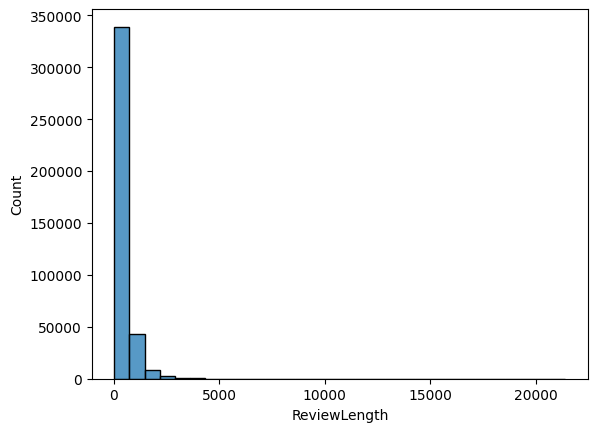

In [92]:
sns.histplot(df['ReviewLength'], bins=30) 
ax.set_title('Distribution of Review Lengths')

# Save the plot
plt.savefig('../reports/images/review_lenghts_distribution.png')

#### Display the relationship between review length and score.

In [93]:
# Calculate the length of each review
df['ReviewLength'] = df['Text'].apply(len)

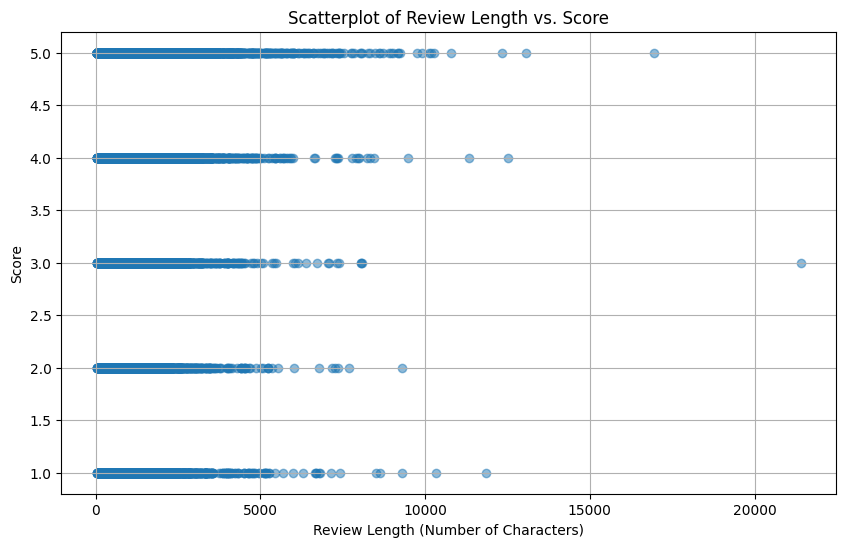

In [94]:
 # Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['ReviewLength'], df['Score'], alpha=0.5)
plt.title('Scatterplot of Review Length vs. Score')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Score')
plt.grid(True)

# Save the plot
plt.savefig('../reports/images/review_lenghts_text_score.png')

plt.show()

### 4. Deep Learning with TensorFlow/Keras

https://www.kaggle.com/code/raman007/amazon-finefood-sentiment-classification-using-knn

#### Matrix confusion to see the correlation

#### Grid Search --> try all methods ML

#### See all metrics

### 5. Parameter Tuning

#### Grid Search

### 6. Integration with Azure ML

### 7. Model Evaluation and Interpretation

### 8. Visualization with Python's Data Visualization Libraries